# Series Temporales y PPDAC

El peso del turismo como motor económico de España es evidente. En 2022 un
11.6% del PIB se debe a este sector y un 9.3% de los puestos de trabajo también
se encuentran en el turismo. No es de estrañar que las principales cadenas de
hoteles tengan grandes presupuestos y den la importancia que merece a analizar
datos del mercado para mejorar en la toma de decisiones.

In [16]:
import pandas as pd
import plotly.express as px
import os

# 1. Problema

En este módulo nos planteamos usar el framework PPDAC para dar respuesta al
siguiente problema:

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    Trabajamos para una consultora especializada en el sector del turismo. Uno
    de nuestros clientes es una cadena de hoteles muy importante en España y
    está en busca de oportunidades en el país para abrir un nuevo hotel. Parece
    que la opción que más convence es en Andalucía, pero necesitan recopilar
    toda la información posible del mercado del turismo en la comunidad autónoma
    antes de tomar una decisión final y nos han encargado esta tarea.
</div>

# 2. Plan

- **Datos**: normalmente un cliente cuenta con datos relevantes sobre su
actividad, su sector o sus clientes, pero este no es el caso. No tenemos ninguna
fuente de información privada que nos ayude a entender el turismo en Andalucía.
Por ello, planteamos explotar fuentes de información públicas.
- **Técnicas**: el objetivo que nos marcamos será analizar la evolución temporal
de los principales KPIs que permitan entender la situación del mercado de
turismo en Andalucía para entender especialmente la tendencia que se tiene en
los últimos años.
- **Fases**:
    - Fase 0: estracción de datos
    - Fase 1: analisis base de los KPIs
    - Fase 2: enriquecimiento del análisis con KPIs adicionales

| Fase | descripcion | detalle |
|------|-------------|---------|
| 0    | extraer datos | Junto a un equipo de Data Engineers se estudia qué fuentes de datos son útiles y cómo automatizar su extracción desde IECA. |
| 1    | analizar KPIs base | Análisis de los principales KPIs para entender la situación del turismo en Andalucía. |
| 2    | enriquecer la Fase 1 con KPIs financieros | Creación y análisis de nuevos KPIs que complementen los análisis de la Fase1 con un foco más financiero. |

# 3. Data

El Instituto de Estadística y Cartografía de Andalucía dispone de una web que
nos permite explorar diferentes fuentes de datos del turismo en la región.

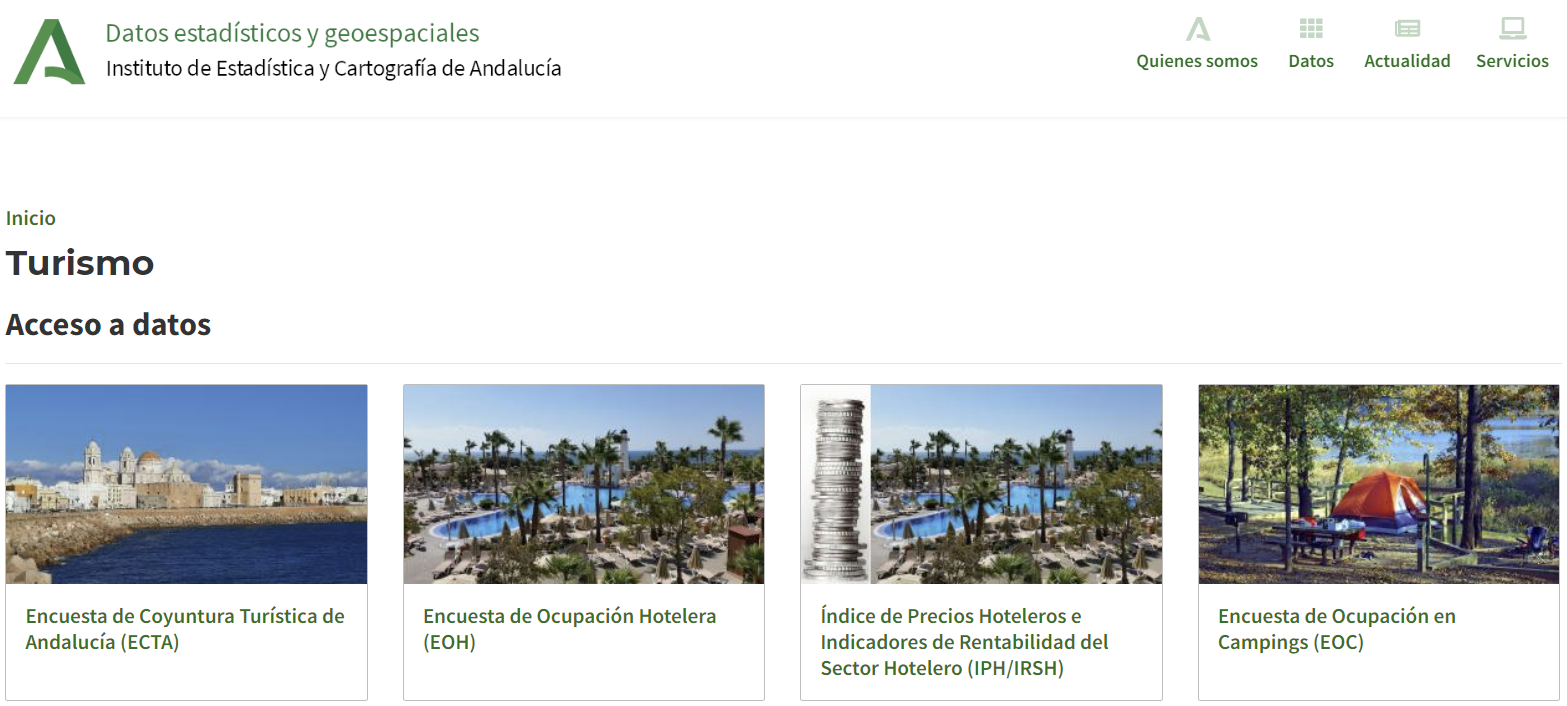

Entre toda la información disponible decidimos extraer las siguientes fuentes
datos:

| local path | descripcion |
|------|-------------|
| [data/andalusia_guests_by_country.parquet](data/andalusia_guests_by_country.parquet) | turistas por pais. |
| [data/andalusia_guests_by_category.parquet](data/andalusia_guests_by_category.parquet) | turistas por categoría de hotel. |
| [data/andalusia_occupancy_kpis.parquet](data/andalusia_occupancy_kpis.parquet) | KPIs de ocupación de los hoteles. |
| [data/andalusia_adr.parquet](data/andalusia_adr.parquet) | precios de las habitaciones. |

# 4. Analysis I

## 4.1. Turistas por País de origen

Una buena forma de comenzar a analizar el mercado del turismo en Andalucía puede
ser analizando la evolución del número de turistas. Afortunadamente para
nosotros, el Instituto de Estatistica y Cartografía de Andalucía (IECA)
proporciona muchos datos del turismo, entre los que tenemos precisamente el
volúmen de turistas.

In [2]:
# para usar Colab

# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# TODO: leer fichero en path data/andalusia_guests_by_country.parquet

df_guests_by_country = pd.read_parquet('./data/andalusia_guests_by_country.parquet')

Contamos con un histórico desde el 2008 hasta el 2023 con las siguiente
información:

| variable          | descripcion |
|-------------------|-------------|
| year_month        | Año-Mes del dato. |
| year              | Año. |
| month             | Mes. |
| country           | País. |
| guests            | Número de turistas que han venido. |
| overnight_stays   | Pernoctaciones que se van a realizar. |
| length_of_stay    | Número de días promedio que se pasará cada turista. |


In [7]:
df_guests_by_country.head()

,year_month,year,month,country,guests,overnight_stays,length_of_stay
0,2008-01,2008,1,belgium,6371.07,35559.89,5.581463
14,2008-02,2008,2,belgium,8019.23,43125.97,5.377819
28,2008-03,2008,3,belgium,14504.09,61209.61,4.220162
42,2008-04,2008,4,belgium,15544.47,67857.53,4.365381
56,2008-05,2008,5,belgium,20851.76,99317.25,4.763015


In [11]:
df_guests_by_country.year.max()

df_guests_by_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2661 entries, 0 to 2660
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_month       2661 non-null   object 
 1   year             2661 non-null   int32  
 2   month            2661 non-null   int64  
 3   country          2661 non-null   object 
 4   guests           2661 non-null   float64
 5   overnight_stays  2661 non-null   float64
 6   length_of_stay   2661 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 155.9+ KB


In [14]:
# TODO: calcular el número de turistas totales por year_month

df_guests_by_country_agg = df_guests_by_country.groupby('year_month', as_index= False)['guests'].sum()

In [18]:
# TODO: lineplot del total de turistas (px.line)

px.line(
    data_frame = df_guests_by_country_agg,
    x = 'year_month',
    y = 'guests'
)

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

Vamos a desglosar el número de turistas por pais de origen, que es la
granularidad original que tenemos en los datos:

In [23]:
# TODO: lineplot de los turistas por pais de origen (px.line)


px.line(
    data_frame = df_guests_by_country,
    x = 'year_month',
    y = 'guests',
    color = 'country'
)

In [30]:
# TODO: calcular el % de turistas por cada origen

# df_guests_by_country.groupby(['year_month','country']).size().max()

por_pais = df_guests_by_country.groupby('country', as_index= False)['guests'].sum()
por_pais['guest_percentage'] = por_pais['guests'] / por_pais['guests'].sum()

por_pais.sort_values(by = 'guest_percentage', ascending= False)

,country,guests,guest_percentage
10,spain,1.471482e+08,0.583423
7,others,3.107699e+07,0.123216
12,united_kingdom,1.866978e+07,0.074023
2,germany,1.153773e+07,0.045746
1,france,1.123938e+07,0.044563
13,united_states,6.581572e+06,0.026095
4,italy,6.446718e+06,0.025560
6,netherlands,5.059327e+06,0.020060
8,portugal,3.648426e+06,0.014466
0,belgium,3.332122e+06,0.013211


<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

Un análisis muy interesante que podemos hacer es estudiar la evolución a lo
largo de los años del % de turistas que hay en cada mes de cada pais de origen:

In [33]:
df_guests_by_country.query('year_month == "2008-01"')

,year_month,year,month,country,guests,overnight_stays,length_of_stay
0,2008-01,2008,1,belgium,6371.07,35559.89,5.581463
1,2008-01,2008,1,france,19810.24,40108.39,2.024629
2,2008-01,2008,1,germany,26961.41,152335.28,5.650123
3,2008-01,2008,1,ireland,4683.83,14362.53,3.066407
4,2008-01,2008,1,italy,18638.84,47234.22,2.534182
5,2008-01,2008,1,japan,10034.27,12500.17,1.245748
6,2008-01,2008,1,netherlands,9663.92,33090.09,3.424086
7,2008-01,2008,1,others,67672.59,149436.99,2.870672
8,2008-01,2008,1,portugal,8561.07,18066.65,2.110326
9,2008-01,2008,1,russia,2335.93,7966.97,3.410620


In [36]:
# TODO: normalizar los turistas mes a mes
df_ = df_guests_by_country.copy()
df_['normalized_guests'] = df_.groupby('year_month')['guests'].transform(lambda x: x / x.sum() * 100)

# TODO: area plot del % de turistas de cada origen

df_


,year_month,year,month,country,guests,overnight_stays,length_of_stay,normalized_guests
0,2008-01,2008,1,belgium,6371.070000,35559.890000,5.581463,0.806663
14,2008-02,2008,2,belgium,8019.230000,43125.970000,5.377819,0.779351
28,2008-03,2008,3,belgium,14504.090000,61209.610000,4.220162,1.071838
42,2008-04,2008,4,belgium,15544.470000,67857.530000,4.365381,1.117214
56,2008-05,2008,5,belgium,20851.760000,99317.250000,4.763015,1.309884
...,...,...,...,...,...,...,...,...
2604,2023-08,2023,8,united_states,41363.497862,100314.760899,2.425200,1.831289
2618,2023-09,2023,9,united_states,68857.637999,159011.616809,2.309281,3.387287
2632,2023-10,2023,10,united_states,79290.658803,173311.035352,2.185769,4.214686
2646,2023-11,2023,11,united_states,44741.525221,100794.918129,2.252827,3.617420


In [39]:
px.area(
    data_frame = df_.sort_values(by = 'normalized_guests', ascending= True),
    x = 'year_month',
    y = 'normalized_guests',
    color = 'country'
)

## 4.2. Turistas por Categoría de hotel

Podemos analizar también el número de turistas que van a Andalucía por categoría
de hotel, atendiendo a la siguiente interpretación:
- **5 estrellas**: turistas con alto poder adquisitivo.
- **4 estrellas**: turistas con presupuesto flexible. 
- **3 estrellas**: turistas con presupuesto ajustado.

In [40]:
# TODO: leer fichero en path data/andalusia_guests_by_category.parquet

df_cat_hotels = pd.read_parquet('data/andalusia_guests_by_category.parquet')

In [41]:
df_cat_hotels.head()

,year_month,year,month,category,guests,length_of_stay,overnight_stays
0,2008-01,2008,1,3_estrellas,197341.61,3.012592,594509.71
1,2008-02,2008,2,3_estrellas,267860.88,2.845444,762183.02
2,2008-03,2008,3,3_estrellas,347254.91,2.883024,1001144.40
3,2008-04,2008,4,3_estrellas,363027.06,2.734880,992835.33
4,2008-05,2008,5,3_estrellas,395944.29,2.799695,1108523.40


Contamos con la siguiente información

| variable          | descripcion |
|-------------------|-------------|
| year_month        | Año-Mes del dato. |
| year              | Año. |
| month             | Mes. |
| category          | Categoría del hotel. |
| guests            | Número de turistas que han venido. |
| length_of_stay    | Número de días promedio que se pasará cada turista. |
| overnight_stays   | Pernoctaciones que se van a realizar. |

In [42]:
df_guests_by_country.merge(right = df_cat_hotels, on = ['year_month','year','month'], how = 'left')

,year_month,year,month,country,guests_x,overnight_stays_x,length_of_stay_x,category,guests_y,length_of_stay_y,overnight_stays_y
0,2008-01,2008,1,belgium,6371.070000,35559.890000,5.581463,3_estrellas,197341.610000,3.012592,5.945097e+05
1,2008-01,2008,1,belgium,6371.070000,35559.890000,5.581463,4_estrellas,359904.920000,2.722328,9.797793e+05
2,2008-01,2008,1,belgium,6371.070000,35559.890000,5.581463,5_estrellas,33801.990000,2.315989,7.828504e+04
3,2008-02,2008,2,belgium,8019.230000,43125.970000,5.377819,3_estrellas,267860.880000,2.845444,7.621830e+05
4,2008-02,2008,2,belgium,8019.230000,43125.970000,5.377819,4_estrellas,485938.900000,2.617697,1.272041e+06
...,...,...,...,...,...,...,...,...,...,...,...
7976,2023-11,2023,11,united_states,44741.525221,100794.918129,2.252827,4_estrellas,659590.991761,2.566119,1.692589e+06
7977,2023-11,2023,11,united_states,44741.525221,100794.918129,2.252827,5_estrellas,61470.638356,2.671769,1.642353e+05
7978,2023-12,2023,12,united_states,37702.642982,82831.853131,2.196977,3_estrellas,235238.370396,2.235507,5.258769e+05
7979,2023-12,2023,12,united_states,37702.642982,82831.853131,2.196977,4_estrellas,604704.691126,2.403938,1.453672e+06


In [45]:
# TODO: lineplot del número de turistas por categoría de hotel (px.line)

px.line(
    data_frame = df_cat_hotels,
    x = 'year_month',
    y = 'guests',
    color = 'category'
)

In [46]:
# TODO: calcular el % de turistas por cada categoría
df_ = df_cat_hotels.copy()
df_['normalized_guests'] = df_.groupby('year_month')['guests'].transform(lambda x: x / x.sum() * 100)

px.line(
    data_frame = df_,
    x = 'year_month',
    y = 'normalized_guests',
    color = 'category'
)


<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

In [47]:
# TODO: normalizar los turistas mes a mes
# TODO: area plot del % de turistas en cada categoria de hotel

px.area(
    data_frame = df_,
    x = 'year_month',
    y = 'normalized_guests',
    color = 'category'
)

## 4.3. Duración de la estancia

Vamos a analizar la duración de la estancia de los turistas, la cual es una
información complementaria al número de turistas.

In [48]:
df_cat_hotels.head()

,year_month,year,month,category,guests,length_of_stay,overnight_stays
0,2008-01,2008,1,3_estrellas,197341.61,3.012592,594509.71
1,2008-02,2008,2,3_estrellas,267860.88,2.845444,762183.02
2,2008-03,2008,3,3_estrellas,347254.91,2.883024,1001144.40
3,2008-04,2008,4,3_estrellas,363027.06,2.734880,992835.33
4,2008-05,2008,5,3_estrellas,395944.29,2.799695,1108523.40


In [50]:
# TODO: lineplot de la estancia media (en dias) por categoria

px.line(
    data_frame = df_cat_hotels,
    x = 'year_month',
    y = 'length_of_stay',
    color = 'category'
)

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

## 4.4. Ocupación hotelera

Inevitablemente el número de turistas que pueden llegar a Andalucía está
determinado por la cantidad de oferta (habitaciones de hoteles). Si en total hay
$X$ hoteles con $Y$ habitaciones, el máximo de turistas que pueden venir es
$X \cdot Y$.

In [51]:
# TODO: leer fichero en path data/andalusia_occupancy_kpis.parquet

df_ocupacion = pd.read_parquet('./data/andalusia_occupancy_kpis.parquet')

Contamos con la siguiente información

| variable          | descripcion |
|-------------------|-------------|
| year_month        | Año-Mes del dato. |
| year              | Año. |
| month             | Mes. |
| category          | Categoría del hotel. |
| rooms_available   | Total de habitaciones ofertadas al público. |
| occupancy         | Porcentaje de ocupación. |

In [52]:
df_ocupacion.head()

,year_month,year,month,category,rooms_available,occupancy
708,2008-01,2008,1,3_estrellas,23527.49,43.513991
709,2008-02,2008,2,3_estrellas,25261.09,56.477811
710,2008-03,2008,3,3_estrellas,28292.41,59.826426
711,2008-04,2008,4,3_estrellas,29321.56,58.791088
712,2008-05,2008,5,3_estrellas,29220.63,61.849651


In [53]:
# TODO: lineplot del número de habitaciones ofertadas por categoría

px.line(
    data_frame = df_ocupacion,
    x = 'year_month',
    y = 'rooms_available',
    color = 'category'
)

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

In [55]:
# TODO: lineplot del % de ocupacion por categoría
px.line(
    data_frame=df_ocupacion,
    x='year_month',
    y='occupancy',
    color='category'
)

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

## 4.5. Precios

Naturalmente, si la oferta limita el número máximo de turistas que puede recibir
Andalucía, el precio que se oferte es un factor clave a la hora de competir con
otros destinos. Vamos a ver cómo han evolucionado los precios ofertados:

In [57]:
# TODO: leer fichero en path data/andalusia_adr.parquet

df_precios = pd.read_parquet('./data/andalusia_adr.parquet')

df_precios.head(2)

,year_month,year,month,category,adr
556,2008-01,2008,1,3_estrellas,45.919986
539,2008-02,2008,2,3_estrellas,46.328603


Contamos con la siguiente información

| variable          | descripcion |
|-------------------|-------------|
| year_month        | Año-Mes del dato. |
| year              | Año. |
| month             | Mes. |
| category          | Categoría del hotel. |
| adr               | Average Daily Rate (precio por noche). |

In [62]:
df_precios.query('category == "5_estrellas" and year == 2021').ffill()

,year_month,year,month,category,adr
187,2021-01,2021,1,5_estrellas,133.326410
170,2021-02,2021,2,5_estrellas,111.683185
154,2021-03,2021,3,5_estrellas,107.378363
138,2021-04,2021,4,5_estrellas,127.870565
123,2021-05,2021,5,5_estrellas,127.870565
108,2021-06,2021,6,5_estrellas,127.870565
93,2021-07,2021,7,5_estrellas,241.806704
77,2021-08,2021,8,5_estrellas,291.129417
61,2021-09,2021,9,5_estrellas,202.880782
45,2021-10,2021,10,5_estrellas,206.189203


In [64]:
df_precios.query('category == "3_estrellas"').head(5)[['adr']].pct_change()

,adr
556,NaN
539,0.008898
523,0.101188
508,0.044642
493,0.042141


In [60]:
# TODO: lineplot del adr por categoría
px.line(
    data_frame=df_precios,
    x='year_month',
    y='adr',
    color='category'
)

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

## 4.6. Conclusiones

Vamos a realizar en esta sección la difícil tarea de recopilar a grandes rasgos
las principales conclusiones de los análisis anteriores:

# 5. Analysis II

El Analysis I nos ha permitido analizar la situación del mercado de turismo a
nivel general sacando conclusiones sobre los principales KPIs. No obstante,
desde el punto de vista de una cadena hotelera que se plantea si abrir o no un
nuevo hotel en Andalucía, es de especial utilidad analizar las oportunidades que
ofrece el mercado del turismo andaluz. Para ello vamos a calcular un nuevo
conjunto de KPIs que ayuden a completar la foto del Analysis I.

## 5.1. Market Value

El *Market Value* literalmente se entiende como el valor que tiene un mercado.
En nuestro caso el *Market Value* del turismo en Andalucía es la cantidad total
de beneficio que se obtiene y definimos con la siguiente fórmula:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ \text{Market Value} = \text{Guests} \cdot \text{Length of Stay} \cdot \text{ADR} $$

</font>
</div>

In [68]:
# TODO: calcular market value uniendo df_guests_by_category y df_adr on=["year_month", "year", "month", "category"]

df_merged = pd.merge(
    left = df_precios,
    right = df_cat_hotels,
    on = ['year_month','year','month','category']
).assign(market_value = lambda x: x.adr * x.length_of_stay * x.guests)

In [69]:
df_merged.head(5)

,year_month,year,month,category,adr,guests,length_of_stay,overnight_stays,market_value
0,2008-01,2008,1,3_estrellas,45.919986,197341.61,3.012592,594509.71,2.729988e+07
1,2008-02,2008,2,3_estrellas,46.328603,267860.88,2.845444,762183.02,3.531087e+07
2,2008-03,2008,3,3_estrellas,51.016520,347254.91,2.883024,1001144.40,5.107490e+07
3,2008-04,2008,4,3_estrellas,53.293977,363027.06,2.734880,992835.33,5.291214e+07
4,2008-05,2008,5,3_estrellas,55.539863,395944.29,2.799695,1108523.40,6.156724e+07


In [73]:
df_merged.groupby(['year','category'], as_index= False)['market_value'].sum()

px.line(
    data_frame=df_merged.groupby(['year','category'], as_index= False)['market_value'].sum(),
    x= 'year',
    y= 'market_value',
    color='category'
)

In [ ]:
# TODO: calcular el market value por año y categoría


# TODO: lineplot del market value

En terminos de volumen de negocio el mercado de 4 estrellas acumula un
*Market Value* muy por encima del mercado de las 3 y 5 estrellas aunque la
tendencia de crecimiento de cada categoría es positiva.

## 5.2. RevPAR

El *RevPAR* (Revenue Per Available Room) debemos entenderlo como el *beneficio
que en media obtiene un hotel por cada habitación disponible que oferta*, que no
es más que el *Market Value* relativizado por el número de habitaciones
disponibles:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ \text{RevPAR} = 
    \frac{ \text{Market Value} }{\text{Available Rooms} \cdot \text{n days of the month}}
$$

</font>
</div>

Con este KPI una cadena hotelera puede hacerse una idea de cuánto beneficio
obtendría en media con un hotel de $X$ habitaciones y comparar hoteles.

In [74]:
# TODO: merge de los dataframes df_market_value y df_occupancy necesarios para calcular el RevPAR

df_merged_2 = df_merged.merge(right = df_ocupacion, on = ['year_month','year','month','category'])

In [78]:
# TODO: calcular el RevPAR
MAPPING_DAYS_MONTH = {
    1: 31,
    2: 28,
    3: 31,
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 31,
    9: 30,
    10: 31,
    11: 30,
    12: 31,
}

# TODO: create n_days column
df_merged_2['n_days'] = df_merged_2['month'].map(MAPPING_DAYS_MONTH)


# TODO: create RevPAR
df_merged_2['revpar'] = df_merged_2['market_value'] / (df_merged_2['n_days'] * df_merged_2['rooms_available'])

# TODO: agrupar por ["category", "year"] y sumar revpar
# TODO: lineplot del RevPAR

df_merged_2

,year_month,year,month,category,adr,guests,length_of_stay,overnight_stays,market_value,rooms_available,occupancy,n_days,revpar
0,2008-01,2008,1,3_estrellas,45.919986,197341.610000,3.012592,5.945097e+05,2.729988e+07,23527.490000,43.513991,31,37.430308
1,2008-02,2008,2,3_estrellas,46.328603,267860.880000,2.845444,7.621830e+05,3.531087e+07,25261.090000,56.477811,28,49.922733
2,2008-03,2008,3,3_estrellas,51.016520,347254.910000,2.883024,1.001144e+06,5.107490e+07,28292.410000,59.826426,31,58.233905
3,2008-04,2008,4,3_estrellas,53.293977,363027.060000,2.734880,9.928353e+05,5.291214e+07,29321.560000,58.791088,30,60.151578
4,2008-05,2008,5,3_estrellas,55.539863,395944.290000,2.799695,1.108523e+06,6.156724e+07,29220.630000,61.849651,31,67.967047
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,2023-08,2023,8,5_estrellas,308.959075,107042.346040,3.700874,3.961503e+05,1.223942e+08,8014.984767,71.828498,31,492.602391
563,2023-09,2023,9,5_estrellas,233.568334,101366.946137,3.236625,3.280868e+05,7.663068e+07,8095.754415,72.606666,30,315.517952
564,2023-10,2023,10,5_estrellas,239.592164,113044.487884,2.948656,3.333294e+05,7.986310e+07,8199.613426,67.626895,31,314.189093
565,2023-11,2023,11,5_estrellas,192.912095,61470.638356,2.671769,1.642353e+05,3.168298e+07,5707.571460,54.551525,30,185.034818


In [82]:
px.line(
    data_frame=df_merged_2.groupby(['year','category'], as_index= False)['revpar'].sum(),
    x='year',
    y='revpar',
    color='category'
)

Cuando relativizamos el *Market Value* por las habitaciones disponibles
ofertadas el beneficio que obtienen los hoteles de 5 estrellas es superior al de
4 estrellas, y éste superior al de 3 estrellas. Un hotel de 5 estrellas en
Andalucía ingresa de media 286€ por habitación disponible, mientras que uno de
4 estrellas recibe 167€ y uno de 3 estrellas 99€.

## 5.3. RevPOR

Por último, el *RevPOR* (Revenue Per Occupied Room) es una variante del *RevPAR* en la que en vez de
relativizar por habitaciones disponible lo hacemos por habitación vendida:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ \text{RevPOR} = 
    \frac{ \text{Market Value} }{\text{Rooms Sold}} =
    \frac{ \text{Market Value} }{\text{Available Rooms} \cdot \text{Occupancy}}
$$

</font>
</div>

In [ ]:
# TODO: calculamos el RevPOR por categoría y año
df_merged_2['n_days'] = df_merged_2['month'].map(MAPPING_DAYS_MONTH)

df_merged_2['revpar'] = df_merged_2['market_value'] / (df_merged_2['n_days'] * df_merged_2['rooms_available'])


In [21]:
# TODO: lineplot del RevPOR